In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [4]:
!unzip "/content/drive/MyDrive/20_selected_projects/8_videoestimation/Vehicle Speed Detection.v1i.yolov5pytorch.zip" -d "/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5"

Archive:  /content/drive/MyDrive/20_selected_projects/8_videoestimation/Vehicle Speed Detection.v1i.yolov5pytorch.zip
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/README.dataset.txt  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/README.roboflow.txt  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml  
   creating: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/train/
   creating: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/train/images/
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/train/images/car101_png.rf.8d10704cb2313ab2ee8f189ff55d401e.jpg  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/train/images/car102_png.rf.aa9c2e1231fff0752df4a98e5927b61c.jpg  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/train/images/car10

In [5]:
!unzip "/content/drive/MyDrive/20_selected_projects/8_videoestimation/Vehicle Speed Detection.v1i.yolov8.zip" -d "/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8"

Archive:  /content/drive/MyDrive/20_selected_projects/8_videoestimation/Vehicle Speed Detection.v1i.yolov8.zip
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/README.dataset.txt  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/README.roboflow.txt  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/data.yaml  
   creating: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/
   creating: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/images/
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/images/car101_png.rf.8d10704cb2313ab2ee8f189ff55d401e.jpg  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/images/car102_png.rf.aa9c2e1231fff0752df4a98e5927b61c.jpg  
 extracting: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/images/car103_png.r

# **YoloV5**

In [4]:
!git clone https://github.com/ultralytics/yolov5 #https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.18 MiB | 8.95 MiB/s, done.
Resolving deltas: 100% (11307/11307), done.


In [5]:
%cd /content/yolov5/

/content/yolov5


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [1]:
ML_Model = []

precision = []
recall = []
mAP = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    precision.append(round(a, 3))
    recall.append(round(b, 3))
    mAP.append(round(c, 3))

# Yolov5s


In [7]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2024-03-19 16:50:13.576471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 16:50:13.576533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 16:50:13.577879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, 

In [2]:
p_yol5s = 0.296
r_yol5s = 0.62
mAP_yolo5s = 0.367

storeResults('YoloV5s',p_yol5s,r_yol5s,mAP_yolo5s)

# Yolov 5x6

In [8]:
!wandb disabled
!python train.py --img 416 --epochs 200 --data /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
2024-03-19 17:11:10.096505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 17:11:10.096566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 17:11:10.097967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps

In [3]:
p_yol5xs = 0.385
r_yol5xs = 0.411
mAP_yolo5xs = 0.409

In [4]:
storeResults('YoloV5x6',p_yol5xs,r_yol5xs,mAP_yolo5xs)

In [9]:
!zip -r /content/drive/MyDrive/20_selected_projects/8_videoestimation/filev5.zip /content/yolov5

updating: content/yolov5/ (stored 0%)
updating: content/yolov5/pyproject.toml (deflated 59%)
updating: content/yolov5/LICENSE (deflated 66%)
updating: content/yolov5/detect.py (deflated 69%)
updating: content/yolov5/requirements.txt (deflated 55%)
updating: content/yolov5/.git/ (stored 0%)
updating: content/yolov5/.git/branches/ (stored 0%)
updating: content/yolov5/.git/logs/ (stored 0%)
updating: content/yolov5/.git/logs/refs/ (stored 0%)
updating: content/yolov5/.git/logs/refs/heads/ (stored 0%)
updating: content/yolov5/.git/logs/refs/heads/master (deflated 28%)
updating: content/yolov5/.git/logs/refs/remotes/ (stored 0%)
updating: content/yolov5/.git/logs/refs/remotes/origin/ (stored 0%)
updating: content/yolov5/.git/logs/refs/remotes/origin/HEAD (deflated 28%)
updating: content/yolov5/.git/logs/HEAD (deflated 28%)
updating: content/yolov5/.git/config (deflated 33%)
updating: content/yolov5/.git/description (deflated 14%)
updating: content/yolov5/.git/refs/ (stored 0%)
updating: con

# YoloV3

In [15]:
%cd /content

/content


In [11]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 11254, done.
remote: Counting objects: 100% (1176/1176), done.
remote: Compressing objects: 100% (497/497), done.
remote: Total 11254 (delta 826), reused 970 (delta 678), pack-reused 10078
Receiving objects: 100% (11254/11254), 9.98 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (7625/7625), done.


In [16]:
%cd /content/yolov3/

/content/yolov3


In [13]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [18]:
!python train.py --img 416 --batch 4 --epochs 200 --data /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml --weights yolov3-tiny.pt

2024-03-19 17:49:58.978186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 17:49:58.978232: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 17:49:58.979531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov3-tiny.pt, cfg=, data=/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=4, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False,

In [5]:
p_yol3 = 0.40
r_yol3 = 0.309
mAP_yolo3 = 0.318

In [6]:
storeResults('YoloV3',p_yol3,r_yol3,mAP_yolo3)

# **YoloV8**

In [19]:
%cd ..

/content


In [2]:
%cd /content/

/content


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [4]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

results = model.train(data="/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/data.yaml", epochs=200, imgsz=416)

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.0MB/s]


Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 755k/755k [00:00<00:00, 17.0MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/labels... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:07<00:00, 22.86it/s]


train: New cache created: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/valid/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:02<00:00, 16.17it/s]

val: New cache created: /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.08G      1.932      4.201      1.471          5        416: 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         40        150    0.00859      0.394      0.117     0.0524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      1.09G      1.767      3.568      1.284         14        416: 100%|██████████| 11/11 [00:01<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         40        150     0.0159      0.469      0.145     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      1.09G      1.703      2.633      1.262         10        416: 100%|██████████| 11/11 [00:01<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         40        150      0.798      0.136        0.2      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      1.08G      1.605      2.365      1.184          7        416: 100%|██████████| 11/11 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         40        150      0.804     0.0885        0.2      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      1.09G       1.68      2.244      1.208          5        416: 100%|██████████| 11/11 [00:01<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         40        150      0.812     0.0984      0.177     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      1.09G      1.577      2.125      1.178          3        416: 100%|██████████| 11/11 [00:01<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         40        150      0.774       0.17      0.192        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.09G      1.445       2.55      1.099          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         40        150      0.606      0.184       0.19      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200       1.1G       1.53      2.122      1.185          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         40        150      0.397      0.217      0.193     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.09G      1.516      1.978      1.187          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         40        150      0.374      0.239      0.209        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.09G      1.536      1.967      1.166          3        416: 100%|██████████| 11/11 [00:00<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40        150      0.339      0.221      0.171     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.08G      1.599      1.881      1.212         19        416: 100%|██████████| 11/11 [00:01<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         40        150      0.476      0.266      0.205      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.09G      1.391      2.417      1.083          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         40        150      0.377      0.222      0.167     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.09G      1.499      1.818      1.189          5        416: 100%|██████████| 11/11 [00:00<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40        150      0.384      0.255      0.177     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.09G      1.525      1.763      1.177          8        416: 100%|██████████| 11/11 [00:01<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         40        150      0.449       0.25      0.225      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.08G      1.481      1.805      1.219          3        416: 100%|██████████| 11/11 [00:00<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         40        150      0.416      0.315      0.232      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.09G      1.456      1.705      1.183          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all         40        150      0.661       0.27      0.224      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.09G      1.518        1.7      1.197          6        416: 100%|██████████| 11/11 [00:00<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40        150      0.681      0.329      0.254      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.09G      1.483       1.77      1.193         17        416: 100%|██████████| 11/11 [00:01<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         40        150      0.452       0.31      0.267      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.12G      1.461      1.626      1.173         10        416: 100%|██████████| 11/11 [00:01<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         40        150      0.227      0.353      0.242      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.09G      1.475      1.604      1.174          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         40        150      0.419      0.298      0.244      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.09G      1.489      1.612      1.188          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         40        150      0.415      0.331      0.236      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.11G      1.512      1.578      1.175          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         40        150      0.564      0.248      0.217      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.09G      1.484      1.525      1.188          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         40        150      0.436      0.276      0.265      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       1.1G      1.441      1.541      1.164          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40        150      0.264       0.36      0.293      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.09G      1.427      1.619      1.159          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         40        150      0.245      0.269      0.259      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       1.1G      1.384      1.485      1.144          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         40        150      0.267       0.34       0.28      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.08G      1.354      1.443       1.12          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         40        150      0.285      0.521      0.303      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200       1.1G      1.383       1.45      1.143          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.01it/s]

                   all         40        150      0.388      0.327      0.317      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.09G      1.419       1.52      1.148         27        416: 100%|██████████| 11/11 [00:01<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         40        150      0.273       0.29      0.281      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.09G      1.381      1.414      1.125          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         40        150      0.449      0.263       0.32      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.08G      1.458      1.507      1.189          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         40        150      0.294      0.262      0.206      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.09G      1.394      1.388      1.143          5        416: 100%|██████████| 11/11 [00:00<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         40        150      0.238      0.331      0.271      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.09G      1.247      1.944      1.045          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         40        150      0.216      0.353      0.284       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.09G      1.394      1.328      1.129          5        416: 100%|██████████| 11/11 [00:01<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         40        150      0.195      0.596      0.282      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.09G      1.433      1.304      1.139         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         40        150      0.239      0.502      0.285      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       1.1G      1.334      1.299      1.114         15        416: 100%|██████████| 11/11 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         40        150      0.245      0.336      0.277      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.09G      1.257      1.822      1.027          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         40        150      0.224      0.267      0.256      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.09G      1.296      1.523      1.114          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         40        150      0.195      0.292      0.261      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.08G      1.178      1.709       1.02          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         40        150      0.321      0.634      0.346      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200       1.1G      1.258      1.357      1.125          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all         40        150      0.334      0.537      0.371      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.11G      1.298      1.256      1.072         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40        150      0.357      0.508      0.398      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.09G      1.287      1.254      1.078         11        416: 100%|██████████| 11/11 [00:01<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         40        150      0.346      0.431      0.363      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.08G      1.339      1.263      1.152          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         40        150      0.364      0.308       0.34      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200       1.1G      1.249      1.366      1.108          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all         40        150      0.245       0.34      0.279      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200       1.1G       1.33      1.208      1.149          8        416: 100%|██████████| 11/11 [00:01<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         40        150      0.284      0.313      0.285      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.09G      1.204      1.706      1.025          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         40        150      0.543      0.282      0.319      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.09G      1.354      1.212      1.162          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         40        150      0.277      0.378      0.325      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.09G      1.295      1.235      1.121         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         40        150      0.306      0.306      0.296      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200       1.1G      1.247      1.171      1.093          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         40        150      0.297      0.269      0.287      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       1.1G      1.335      1.181       1.13          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all         40        150      0.252      0.377       0.29      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.08G      1.187      1.906      1.013          0        416: 100%|██████████| 11/11 [00:00<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         40        150      0.456      0.383      0.304      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.09G      1.335      1.267      1.123          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         40        150      0.315      0.369      0.333      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.09G      1.166      1.085       1.09          3        416: 100%|██████████| 11/11 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         40        150      0.297       0.41      0.344      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.09G      1.213      1.117      1.075          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         40        150      0.289       0.37      0.324      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.08G      1.288      1.142      1.101          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         40        150        0.3       0.31      0.293      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.09G      1.267      1.208      1.132          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         40        150      0.331      0.398      0.323      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.09G       1.28      1.232       1.09          2        416: 100%|██████████| 11/11 [00:00<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         40        150       0.29      0.323      0.318      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       1.1G      1.254      1.077      1.075          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         40        150      0.363      0.277      0.314      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.08G      1.207      1.091       1.07          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         40        150      0.286       0.35      0.325      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.09G      1.255      1.223      1.102         11        416: 100%|██████████| 11/11 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         40        150      0.525      0.286      0.316      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200       1.1G       1.27      1.166        1.1          7        416: 100%|██████████| 11/11 [00:00<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         40        150      0.317      0.302      0.305      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200       1.1G      1.188      1.088      1.058         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         40        150      0.352      0.328      0.303       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.08G        1.1      1.508     0.9592          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         40        150      0.327      0.354      0.277      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.09G      1.262      1.014      1.094          5        416: 100%|██████████| 11/11 [00:01<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         40        150      0.341      0.294      0.304      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.09G       1.21      1.042      1.079          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all         40        150      0.262      0.379      0.323      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200       1.1G      1.191      1.009      1.069         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         40        150      0.262      0.386      0.325      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.08G      1.175     0.9587      1.056          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         40        150      0.558      0.311       0.31      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       1.1G      1.163      1.003      1.052          9        416: 100%|██████████| 11/11 [00:00<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all         40        150      0.524      0.321      0.319      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200       1.1G      1.113      1.087      1.036          1        416: 100%|██████████| 11/11 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         40        150      0.516      0.288      0.321      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.09G      1.173     0.9785      1.023          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         40        150      0.297       0.36      0.337      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.08G      1.262      1.001      1.233          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         40        150      0.306      0.356       0.37      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200       1.1G      1.223      1.037      1.077          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all         40        150      0.344       0.48      0.409      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.09G      1.186      1.004      1.115          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         40        150      0.348      0.427      0.397      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.09G      1.164      1.161      1.086          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         40        150        0.4      0.602      0.405      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.08G      1.138      1.008      1.037          3        416: 100%|██████████| 11/11 [00:00<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         40        150      0.494      0.556      0.412      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.09G      1.146     0.9034      1.034         13        416: 100%|██████████| 11/11 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         40        150      0.402      0.442      0.393      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.09G      1.164     0.9847      1.054          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         40        150      0.437      0.447      0.387      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.09G       1.19      1.014      1.124          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         40        150       0.49      0.444      0.401      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.09G      1.283     0.9851      1.103          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all         40        150      0.374      0.449      0.378      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.09G      1.107     0.8435      1.076          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         40        150      0.557      0.344       0.35      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.09G      1.103     0.8804      1.013          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         40        150      0.558      0.327      0.354      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.09G      1.079     0.8773      1.043          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         40        150      0.558      0.312      0.337      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.08G      1.013      1.384     0.9412          0        416: 100%|██████████| 11/11 [00:00<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         40        150       0.56      0.497       0.33      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       1.1G       1.12        0.9      1.024          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         40        150      0.543      0.494      0.309      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.09G      1.163     0.8937      1.048          9        416: 100%|██████████| 11/11 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all         40        150      0.536      0.264      0.307      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.09G      1.118     0.8323      1.056          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         40        150      0.263      0.316      0.301      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.08G      1.135      0.817      1.045          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all         40        150      0.336      0.387      0.369      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.09G      1.105     0.7916      1.044          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         40        150      0.531        0.3      0.383        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       1.1G      1.152     0.9062      1.055          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all         40        150      0.465      0.333      0.401      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200       1.1G      1.134     0.8626      1.035          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all         40        150      0.542      0.332      0.399      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.08G       1.06      1.033      1.068          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         40        150      0.404      0.405      0.394      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.09G      1.087     0.8436       1.02          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         40        150      0.458      0.406      0.396      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.09G      1.087     0.8292      1.008          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         40        150      0.518      0.394      0.394       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.09G      1.056     0.8984      1.027          3        416: 100%|██████████| 11/11 [00:01<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         40        150      0.494      0.369      0.371      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.08G        1.1       1.13      1.061          1        416: 100%|██████████| 11/11 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         40        150      0.501      0.359      0.379      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.09G      1.181     0.8788      1.034          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         40        150      0.333      0.433      0.381      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.09G      1.046     0.8477      1.024          8        416: 100%|██████████| 11/11 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         40        150      0.315      0.432      0.377      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.09G      1.085     0.9256       1.06          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all         40        150      0.443      0.391      0.387      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.08G     0.9977     0.7951      1.017          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         40        150      0.447      0.408      0.387      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.09G      1.033     0.8829      1.027          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         40        150      0.458      0.411      0.389      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.09G      1.066     0.8617      1.014          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         40        150      0.525      0.361       0.38      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.09G      1.117      0.884      1.033          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         40        150       0.48      0.331      0.335       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.08G       1.05     0.7787       1.07          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all         40        150      0.377      0.411      0.373      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200       1.1G      1.036     0.8041     0.9964         11        416: 100%|██████████| 11/11 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         40        150       0.47      0.368      0.392      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       1.1G      1.043     0.8612       1.01         20        416: 100%|██████████| 11/11 [00:01<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         40        150      0.686      0.372      0.392      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.09G      1.105      1.017      1.043          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all         40        150      0.428      0.393      0.387      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.08G     0.9995     0.9737      1.003          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         40        150       0.41      0.417      0.397       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.09G      1.039      0.804      1.022          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         40        150      0.392       0.43      0.384      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200       1.1G      1.058     0.7785     0.9956         10        416: 100%|██████████| 11/11 [00:01<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         40        150      0.381      0.445      0.381      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       1.1G      1.133      1.038      1.076          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all         40        150       0.39      0.447      0.388      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.08G       1.07     0.7806     0.9985          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all         40        150      0.394       0.43      0.387      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       1.1G      1.064     0.7901      1.001          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         40        150      0.335      0.436      0.393      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.09G       1.06     0.8176      1.011          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         40        150      0.294      0.362      0.353      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.09G      0.886     0.8081     0.9024          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all         40        150      0.294      0.405      0.361      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.08G       1.04     0.7246      1.001          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         40        150      0.567      0.315       0.36      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.09G      1.007     0.7325      1.002          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         40        150      0.307      0.452      0.341      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.09G      1.038     0.8731      1.044          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         40        150      0.257      0.394      0.315      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.09G      1.067      1.039      1.031          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         40        150      0.243      0.385      0.304      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.08G     0.9471      0.694     0.9812          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all         40        150      0.452      0.401      0.342      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200       1.1G     0.9356     0.7379     0.9723          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         40        150      0.617       0.31      0.359      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       1.1G     0.9703     0.7068     0.9887          9        416: 100%|██████████| 11/11 [00:00<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         40        150      0.301        0.4      0.369      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.09G      1.023     0.7845      1.041          6        416: 100%|██████████| 11/11 [00:00<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         40        150      0.371      0.402      0.369      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.08G     0.9454     0.7564     0.9741         13        416: 100%|██████████| 11/11 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all         40        150      0.806       0.32      0.354      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200       1.1G     0.9736     0.7669     0.9825          9        416: 100%|██████████| 11/11 [00:01<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         40        150      0.805      0.287      0.339      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.09G     0.9531     0.6962     0.9729         16        416: 100%|██████████| 11/11 [00:01<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         40        150      0.623      0.276      0.358      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       1.1G      1.015     0.7052      1.001          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all         40        150      0.464       0.35      0.392      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.08G     0.9927     0.7545     0.9852         21        416: 100%|██████████| 11/11 [00:01<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         40        150      0.423      0.439      0.392      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200       1.1G     0.9887     0.7305      1.018          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         40        150      0.461      0.438      0.403      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200       1.1G     0.9659     0.7462      0.976          1        416: 100%|██████████| 11/11 [00:00<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         40        150      0.455      0.439      0.413      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.09G     0.8931     0.6547     0.9689          4        416: 100%|██████████| 11/11 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         40        150      0.507      0.439      0.421      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.08G      1.017     0.6657      1.026          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         40        150      0.506      0.384      0.422      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.09G     0.8969     0.7158     0.9574          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         40        150      0.483      0.445      0.413      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.09G     0.8319     0.9702     0.8779          0        416: 100%|██████████| 11/11 [00:00<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all         40        150      0.474      0.448      0.405      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.09G     0.9758     0.6801     0.9606          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all         40        150      0.471      0.369      0.395       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.08G      0.911     0.7381     0.9632          1        416: 100%|██████████| 11/11 [00:00<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         40        150      0.788      0.268      0.329      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       1.1G     0.9716      0.712      1.046          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         40        150      0.516      0.304      0.322       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.11G     0.9503     0.7002      1.036          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         40        150      0.476      0.309      0.316      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.09G     0.9263     0.6563     0.9718         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         40        150      0.532      0.284       0.31      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.08G     0.9461     0.6724     0.9907          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         40        150      0.497      0.345      0.313      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.09G     0.8857     0.6473     0.9436          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         40        150      0.482      0.323      0.309      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200       1.1G     0.9297     0.6829     0.9779          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         40        150      0.521      0.359      0.338      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200       1.1G     0.9154     0.8379     0.9909          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         40        150      0.572      0.344      0.362      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.08G      1.026     0.6894      1.027          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         40        150      0.523      0.373      0.378      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200       1.1G     0.8684     0.6573     0.9427         12        416: 100%|██████████| 11/11 [00:01<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all         40        150      0.595      0.357       0.39       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.09G     0.8415      1.184      0.882          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         40        150      0.604      0.354      0.389      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.09G     0.9448     0.6451     0.9628          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         40        150      0.584      0.363      0.365      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.08G     0.8436     0.6117     0.9496          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         40        150      0.577      0.336      0.363      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.09G      1.022      1.128      1.054          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         40        150      0.586      0.318       0.36      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200       1.1G     0.8952     0.6619     0.9484         13        416: 100%|██████████| 11/11 [00:00<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         40        150       0.56      0.323      0.357      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200       1.1G      0.958     0.6287     0.9769          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         40        150      0.604      0.297      0.347      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.08G     0.9376     0.8694     0.9109          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         40        150      0.573      0.314      0.344      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       1.1G     0.8759      0.783     0.9635          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         40        150      0.575      0.291      0.354      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.09G     0.8919     0.6298     0.9356         14        416: 100%|██████████| 11/11 [00:01<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         40        150      0.449      0.406      0.386      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.09G     0.8417     0.6753     0.9724          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         40        150      0.404      0.414      0.399      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.08G     0.8131     0.7947     0.8738          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         40        150      0.404      0.428      0.393       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.09G     0.9144      0.662     0.9833          9        416: 100%|██████████| 11/11 [00:01<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         40        150      0.477      0.419      0.393      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200       1.1G     0.8667     0.5993     0.9436          5        416: 100%|██████████| 11/11 [00:00<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         40        150       0.41      0.414      0.394      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.09G     0.8614     0.6113     0.9445          9        416: 100%|██████████| 11/11 [00:00<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         40        150       0.38      0.416      0.359      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.08G     0.9017      0.635     0.9602          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         40        150      0.394      0.432      0.395      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200       1.1G     0.8235     0.7397     0.9634          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         40        150      0.428      0.423      0.399      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.09G     0.9222     0.7698       1.03          9        416: 100%|██████████| 11/11 [00:01<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         40        150      0.438      0.411      0.392      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.09G     0.8854     0.7013     0.9664          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all         40        150      0.479      0.395      0.386      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.08G     0.8511     0.5995     0.9437          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         40        150      0.423       0.42      0.383      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.09G     0.8294     0.6266     0.9581         10        416: 100%|██████████| 11/11 [00:01<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         40        150      0.483      0.347      0.379      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.09G     0.8927     0.6526     0.9308          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         40        150      0.487      0.334      0.378      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.11G     0.8884     0.7276      0.958         11        416: 100%|██████████| 11/11 [00:01<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         40        150      0.475      0.332      0.378      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.08G     0.8267     0.6442     0.9329         13        416: 100%|██████████| 11/11 [00:01<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         40        150      0.465      0.337      0.379      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.09G     0.8482     0.6276     0.9333         15        416: 100%|██████████| 11/11 [00:01<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         40        150      0.427      0.418      0.377      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200       1.1G     0.8696      0.584     0.9579          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         40        150      0.442      0.394      0.377      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200       1.1G     0.7821     0.6248     0.8651          0        416: 100%|██████████| 11/11 [00:01<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         40        150      0.448      0.393      0.379      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.08G     0.8716     0.8164     0.9564         10        416: 100%|██████████| 11/11 [00:01<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all         40        150       0.42      0.407      0.383      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.09G     0.8118     0.6781     0.9551          5        416: 100%|██████████| 11/11 [00:00<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         40        150      0.411      0.419      0.378      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       1.1G     0.8417     0.5978     0.9389          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         40        150      0.423      0.419      0.382       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.09G      0.839     0.5653     0.9229          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all         40        150      0.393      0.426      0.382      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.09G     0.8431     0.6549     0.9524          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all         40        150      0.426      0.428      0.381      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.09G     0.8222     0.6132     0.9376          5        416: 100%|██████████| 11/11 [00:01<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         40        150      0.465      0.423      0.382      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.09G     0.8061     0.6275     0.9513          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all         40        150      0.486      0.402      0.382      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.09G     0.8587     0.5863     0.9589          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         40        150      0.503       0.37      0.381      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.09G     0.8456     0.6444     0.9562          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         40        150      0.521      0.364      0.377       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.09G     0.8397      0.591     0.9631          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all         40        150      0.516      0.362      0.377      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.09G       0.76     0.5453     0.9463          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         40        150      0.497      0.379       0.38      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.09G     0.8231     0.6674     0.9552          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         40        150      0.495      0.396      0.385      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.08G     0.8438     0.7824     0.9734          9        416: 100%|██████████| 11/11 [00:01<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         40        150      0.522      0.389      0.391      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200       1.1G     0.8305     0.6535     0.9303         11        416: 100%|██████████| 11/11 [00:01<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all         40        150      0.521      0.401      0.395       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.09G     0.8065     0.6444     0.9468          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         40        150      0.504      0.402      0.393      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200       1.1G     0.8096     0.5677     0.9499          4        416: 100%|██████████| 11/11 [00:00<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all         40        150      0.475      0.407      0.397      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.08G     0.7921     0.6292      0.941         16        416: 100%|██████████| 11/11 [00:01<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         40        150      0.457      0.407      0.397      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.09G     0.8404     0.5896     0.9509          4        416: 100%|██████████| 11/11 [00:01<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         40        150      0.458      0.412      0.399      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       1.1G     0.7768     0.5309     0.9056          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all         40        150      0.448      0.421      0.404      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.09G     0.8645     0.5975     0.9962          2        416: 100%|██████████| 11/11 [00:01<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all         40        150      0.445      0.416      0.407      0.224


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.22G     0.8039     0.5514     0.9224          9        416: 100%|██████████| 11/11 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         40        150      0.467      0.421      0.398      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.09G     0.8628     0.5676      0.902          7        416: 100%|██████████| 11/11 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         40        150      0.457      0.418      0.392      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.09G     0.7208     0.5989     0.8861          7        416: 100%|██████████| 11/11 [00:01<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         40        150      0.453      0.416      0.393      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      1.09G      0.774     0.6082     0.9228          6        416: 100%|██████████| 11/11 [00:01<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         40        150      0.466      0.414      0.394      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.08G     0.7693     0.4947     0.9043          1        416: 100%|██████████| 11/11 [00:01<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         40        150      0.468      0.411      0.396      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.09G      0.734      0.542     0.9145          2        416: 100%|██████████| 11/11 [00:01<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         40        150      0.454      0.409      0.395      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.09G     0.7637     0.8023      0.915          3        416: 100%|██████████| 11/11 [00:01<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         40        150      0.462      0.404      0.393      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.09G     0.7315     0.5362     0.9001          8        416: 100%|██████████| 11/11 [00:01<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         40        150      0.472      0.404      0.393      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.08G     0.7367     0.4813     0.8929          1        416: 100%|██████████| 11/11 [00:01<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         40        150      0.439      0.404      0.393       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.09G     0.6705      0.463     0.8759          1        416: 100%|██████████| 11/11 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         40        150      0.438      0.404      0.393      0.219



200 epochs completed in 0.097 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


                   all         40        150      0.511      0.439      0.422      0.239
               Car- 45         40          1          0          0     0.0103    0.00513
               Car- 60         40         90      0.523      0.744      0.664      0.378
           Car- 90-120         40         42      0.483      0.762      0.595       0.31
              truck-40         40         14      0.616      0.357      0.487      0.327
              truck-60         40          3      0.932      0.333      0.351      0.174
Speed: 0.4ms preprocess, 1.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


In [7]:
p_yol5s = 0.511
r_yol5s = 0.439
mAP_yolo5s = 0.422

storeResults('YoloV8n',p_yol5s,r_yol5s,mAP_yolo5s)

In [5]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")

results = model.train(data="/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/data.yaml", epochs=200, imgsz=416)

100%|██████████| 21.5M/21.5M [00:00<00:00, 143MB/s] 


Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

train: Scanning /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/train/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/20_selected_projects/8_videoestimation/yolov8/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.03G      2.137      4.557      1.684          5        416: 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         40        150      0.368      0.267      0.175     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.11G      1.781      2.374      1.369         14        416: 100%|██████████| 11/11 [00:01<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all         40        150      0.207      0.502      0.231       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.12G      1.631      1.966      1.289         10        416: 100%|██████████| 11/11 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all         40        150      0.618      0.326      0.244      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200       2.1G      1.478      1.856      1.233          7        416: 100%|██████████| 11/11 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]

                   all         40        150      0.182       0.32      0.211      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200       2.1G      1.603      1.766      1.261          5        416: 100%|██████████| 11/11 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         40        150      0.396      0.343      0.241      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.12G      1.482      1.667      1.268          3        416: 100%|██████████| 11/11 [00:01<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         40        150       0.19      0.417      0.242      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      1.97G      1.409      1.758      1.168          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         40        150      0.494      0.273      0.274      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      1.98G      1.518      1.706      1.231          3        416: 100%|██████████| 11/11 [00:01<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         40        150      0.426      0.245       0.19     0.0872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      1.97G      1.515      1.512      1.245          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all         40        150      0.207      0.211      0.179      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      1.98G      1.449      1.562       1.18          3        416: 100%|██████████| 11/11 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         40        150       0.47      0.275      0.223      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      1.95G       1.55      1.595      1.245         19        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         40        150      0.203      0.527       0.22      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      1.98G      1.343      1.896      1.091          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         40        150      0.427      0.371      0.241      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      1.97G      1.435      1.426      1.207          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         40        150      0.716      0.314      0.194     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      1.97G      1.508      1.424      1.198          8        416: 100%|██████████| 11/11 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         40        150      0.392      0.446      0.201      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      1.95G      1.429      1.331      1.222          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         40        150      0.279      0.547      0.277      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      1.97G      1.478      1.325      1.259          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all         40        150      0.168      0.365      0.187     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      1.97G      1.482       1.31      1.212          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all         40        150      0.142      0.366      0.188     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      1.97G      1.439      1.343      1.209         17        416: 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         40        150      0.222      0.273      0.236      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      1.99G      1.421      1.236      1.191         10        416: 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         40        150      0.261      0.362      0.243      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      1.98G      1.413      1.163      1.191          6        416: 100%|██████████| 11/11 [00:01<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         40        150      0.466      0.336      0.276      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      1.97G      1.417      1.174      1.178          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         40        150      0.569      0.255      0.199      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      1.97G       1.42      1.222      1.177          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         40        150       0.56      0.198      0.185     0.0965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      1.96G       1.43      1.208      1.236          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         40        150       0.14      0.269      0.208      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      1.98G      1.385      1.234      1.163          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         40        150      0.202      0.308      0.215      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      1.97G      1.358      1.275      1.159          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40        150      0.261      0.302      0.243      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      1.97G      1.352      1.225      1.188          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all         40        150      0.305      0.267      0.282      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      1.96G      1.344      1.126      1.149          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         40        150      0.294      0.289      0.265      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      1.98G      1.347       1.12      1.156          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         40        150      0.361      0.277      0.242      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      1.97G      1.364      1.208      1.147         27        416: 100%|██████████| 11/11 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         40        150       0.23      0.308      0.248      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      1.97G      1.336      1.001      1.159          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         40        150       0.25      0.299      0.253      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      1.95G      1.371      1.193      1.161          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         40        150      0.242      0.367      0.239      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      1.97G      1.323      1.029      1.142          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         40        150      0.435      0.367      0.343      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      1.97G      1.183      1.217      1.022          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         40        150       0.37      0.313      0.365      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      1.97G      1.355      1.052      1.133          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all         40        150      0.334      0.349      0.272       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      1.96G      1.396      1.036      1.157         12        416: 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         40        150      0.356      0.363      0.326      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      1.98G      1.276     0.9349      1.103         15        416: 100%|██████████| 11/11 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         40        150      0.645      0.326      0.356      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      1.97G       1.18      1.206      1.012          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40        150      0.229      0.399      0.305      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      1.97G      1.314      1.008      1.292          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40        150      0.297      0.292      0.278      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      1.96G      1.119      1.358      1.023          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         40        150      0.275      0.373        0.3      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      1.98G      1.208     0.9782      1.119          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         40        150      0.239       0.33      0.264      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      1.98G       1.24     0.9847      1.062         12        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         40        150      0.279      0.264       0.26      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      1.97G      1.216     0.9659      1.066         11        416: 100%|██████████| 11/11 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         40        150       0.25      0.314      0.286      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      1.96G      1.281     0.9178      1.143          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         40        150       0.38      0.342      0.322      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      1.98G      1.185     0.9103      1.079          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         40        150      0.258       0.29      0.261      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      1.97G      1.219     0.8691      1.126          8        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         40        150      0.324      0.243      0.254      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      1.98G      1.139      1.198      1.026          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         40        150      0.379      0.396       0.32      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      1.96G      1.256     0.8594       1.16          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         40        150      0.314      0.388      0.293       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      1.98G      1.218     0.9666      1.102         12        416: 100%|██████████| 11/11 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         40        150      0.438       0.31      0.327      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      1.97G      1.295     0.8497       1.17          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         40        150      0.533      0.309      0.344      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      1.98G      1.268     0.8532      1.105          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         40        150      0.383      0.351       0.36      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      1.95G       1.07      1.034     0.9612          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         40        150       0.26      0.347      0.298      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      1.97G      1.213      1.051      1.092          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40        150      0.233      0.306       0.25      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      1.97G      1.084     0.8154      1.076          3        416: 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         40        150      0.274      0.296      0.251      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      1.97G      1.146     0.8012      1.062          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         40        150      0.343      0.323      0.289      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      1.96G      1.229     0.8195      1.107          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         40        150      0.549      0.275      0.287      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      1.98G      1.206     0.9524      1.128          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         40        150      0.524      0.279      0.317      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      1.97G      1.234     0.9844      1.097          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40        150      0.269      0.337      0.326      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      1.98G      1.174     0.8113      1.065          5        416: 100%|██████████| 11/11 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         40        150      0.296      0.367      0.328      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      1.95G      1.127     0.8133       1.05          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all         40        150      0.352      0.395      0.301      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      1.98G      1.142     0.9429      1.076         11        416: 100%|██████████| 11/11 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         40        150      0.527      0.289      0.311      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      1.98G      1.108     0.7564      1.064          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         40        150      0.536      0.266      0.293      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      1.97G      1.064      0.806      1.019         12        416: 100%|██████████| 11/11 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         40        150      0.275      0.354      0.286      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      1.96G      1.011     0.8167      0.947          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         40        150      0.301       0.34      0.286       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      1.97G      1.182     0.7335      1.084          5        416: 100%|██████████| 11/11 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         40        150      0.577      0.273      0.319      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      1.97G      1.154     0.7588      1.058          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         40        150      0.741      0.302      0.337       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      1.97G      1.115     0.7406      1.042         12        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         40        150      0.511      0.311      0.305      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      1.96G      1.079     0.6932      1.023          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40        150       0.33       0.32      0.319      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      1.98G      1.127     0.7584      1.057          9        416: 100%|██████████| 11/11 [00:01<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         40        150      0.358      0.337      0.364      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      1.97G     0.9831     0.6826      1.034          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         40        150      0.585      0.326      0.351      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      1.97G      1.074     0.7445     0.9963          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         40        150      0.356      0.317      0.313      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      1.96G      1.188     0.7326      1.234          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         40        150      0.292      0.359      0.317      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      1.99G      1.051     0.7218      1.042          2        416: 100%|██████████| 11/11 [00:01<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         40        150      0.505      0.378      0.338      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      1.98G      1.089     0.7875      1.084          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         40        150       0.51      0.357      0.335      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      1.97G      1.077     0.7735      1.064          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         40        150       0.36       0.31      0.329      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      1.96G      1.017     0.6654      1.011          3        416: 100%|██████████| 11/11 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         40        150      0.353      0.343      0.323       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      1.97G      1.003     0.6606      1.002         13        416: 100%|██████████| 11/11 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         40        150      0.367      0.316      0.329      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      1.97G      1.104     0.7151      1.056          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         40        150      0.332       0.32      0.339      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      1.97G        1.1     0.7366      1.134          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         40        150      0.326      0.375      0.353      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      1.97G      1.158     0.8416      1.089          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         40        150      0.351      0.494      0.388      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      1.98G      1.019     0.5856      1.033          3        416: 100%|██████████| 11/11 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         40        150      0.338       0.46      0.365      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      1.97G       1.07      0.661      1.025          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40        150      0.338       0.46       0.36      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      1.98G      1.064      0.645      1.094          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         40        150      0.327      0.345      0.362      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      1.95G     0.9089     0.9639     0.9156          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         40        150      0.348      0.344       0.36      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      1.98G     0.9748     0.6023     0.9804          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         40        150      0.363      0.357      0.368      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      1.97G      1.028     0.6655      1.005          9        416: 100%|██████████| 11/11 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all         40        150      0.585      0.335      0.358      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      1.97G      1.025     0.6186      1.024          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         40        150      0.511      0.365      0.315      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      1.96G     0.9766     0.6776     0.9991          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         40        150      0.509      0.348       0.29       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      1.97G      0.961     0.5754      1.014          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         40        150      0.331      0.339      0.293      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      1.98G      1.002      0.707      1.018          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         40        150      0.315      0.313      0.298      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      1.97G     0.9563     0.6107     0.9883          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         40        150       0.31      0.337      0.322      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      1.95G     0.9472     0.5831      1.077          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         40        150      0.281      0.373      0.317      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      1.97G      0.906     0.6157     0.9693          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         40        150      0.493      0.313      0.304       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      1.97G     0.9242     0.5824     0.9644          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         40        150      0.284      0.417      0.319      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      1.98G     0.8928     0.6391     0.9836          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         40        150      0.372      0.418      0.345      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      1.95G      1.052      1.052      1.115          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         40        150      0.548      0.342      0.331      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      1.98G      1.014     0.6273      1.003          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all         40        150      0.279      0.376      0.305      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      1.97G      0.905     0.6011     0.9788          8        416: 100%|██████████| 11/11 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         40        150      0.309      0.358      0.313      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      1.97G      1.108     0.9471      1.204          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         40        150      0.344      0.324      0.331      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      1.96G      1.064     0.9344      1.078          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         40        150      0.517      0.344      0.319      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      1.98G       0.87     0.6298     0.9724          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         40        150      0.276      0.334      0.302      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      1.97G     0.9347     0.6865     0.9823          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         40        150      0.252      0.333       0.29      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      1.97G     0.9121     0.6014     0.9648          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         40        150      0.252       0.33      0.276      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      1.96G     0.9215      0.637      1.031          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40        150      0.553      0.251      0.276      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      1.98G     0.9193       0.61     0.9555         11        416: 100%|██████████| 11/11 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         40        150      0.493       0.34      0.285       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      1.98G     0.8947     0.6079     0.9629         20        416: 100%|██████████| 11/11 [00:01<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all         40        150      0.508      0.358        0.3      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      1.97G      0.989     0.6146      1.027          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.17it/s]

                   all         40        150      0.554      0.296      0.306       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      1.95G     0.8308     0.7873     0.9531          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40        150      0.536      0.318      0.317      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      1.98G     0.8983     0.5848     0.9785          4        416: 100%|██████████| 11/11 [00:01<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         40        150      0.603      0.303      0.336       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      1.97G     0.9105     0.5505     0.9481         10        416: 100%|██████████| 11/11 [00:01<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         40        150      0.392        0.4      0.355      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      1.97G     0.9652     0.8708      1.031          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         40        150      0.494      0.389      0.414       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      1.97G     0.8726     0.5449     0.9524          2        416: 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all         40        150      0.451      0.425      0.409      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      1.98G     0.9053     0.5925     0.9549          2        416: 100%|██████████| 11/11 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all         40        150       0.64       0.35      0.404      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      1.97G     0.9141     0.7926     0.9687          7        416: 100%|██████████| 11/11 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         40        150      0.485      0.423      0.384      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      1.98G     0.7845      0.536     0.8682          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         40        150      0.475      0.418      0.381      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      1.96G     0.8451     0.5082     0.9501          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all         40        150      0.394      0.414      0.349       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      1.97G     0.9221     0.5573     0.9868          4        416: 100%|██████████| 11/11 [00:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         40        150      0.418      0.289      0.335      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      1.97G      1.009     0.7657      1.085          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all         40        150      0.402       0.28      0.337      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      1.97G     0.9787     0.6766      1.034          2        416: 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         40        150      0.326      0.316      0.331      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      1.96G      0.816     0.5632     0.9566          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         40        150      0.405      0.315      0.353      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      1.98G     0.8104     0.5249     0.9431          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         40        150      0.341      0.357      0.346      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      1.98G     0.8155     0.5198     0.9368          9        416: 100%|██████████| 11/11 [00:01<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         40        150      0.297      0.382      0.337      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      1.98G     0.8714     0.6109          1          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all         40        150      0.356      0.329      0.317      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      1.97G     0.8058     0.5489     0.9336         13        416: 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all         40        150      0.339      0.299      0.304      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      1.98G      0.807     0.5691      0.939          9        416: 100%|██████████| 11/11 [00:01<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all         40        150      0.314        0.4      0.319      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      1.97G     0.8211     0.5188     0.9363         16        416: 100%|██████████| 11/11 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         40        150      0.315      0.426      0.324       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      1.98G     0.8397       0.57     0.9565          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         40        150      0.341      0.384      0.341      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      1.95G     0.7979     0.5293     0.9355         21        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         40        150       0.36      0.398      0.358      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      1.98G     0.8199     0.5414     0.9512          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         40        150       0.35      0.415      0.353      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      1.97G     0.8066     0.4982     0.9504          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all         40        150      0.348      0.387      0.356      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      1.97G     0.7116      0.451     0.9192          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         40        150      0.305      0.401      0.351      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      1.97G      0.826     0.4829     0.9566          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         40        150       0.43      0.415      0.372       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      1.98G     0.7741     0.4701     0.9146          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         40        150      0.425      0.402      0.363        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      1.97G     0.6749     0.6068     0.8384          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         40        150      0.379      0.446      0.354      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      1.97G     0.7451     0.4893     0.9022          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all         40        150      0.355      0.332      0.344      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      1.96G     0.7294     0.5171     0.9546          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all         40        150       0.53      0.361      0.345      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      1.98G     0.8071     0.4985      1.022          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         40        150      0.322      0.332       0.34      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      1.98G     0.7041     0.4368     0.9058          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         40        150      0.259      0.392      0.338      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      1.97G     0.7749     0.4638      0.927         12        416: 100%|██████████| 11/11 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         40        150      0.285      0.343      0.326      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      1.96G     0.7841     0.5232     0.9319          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         40        150      0.796      0.271      0.333      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      1.97G     0.7883     0.4766     0.9096          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         40        150      0.608      0.286       0.34      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      1.98G     0.7673     0.4936     0.9383          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         40        150      0.279      0.383      0.337      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      1.98G     0.7592     0.4934     0.9436          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         40        150      0.563      0.314       0.34        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      1.96G     0.7543     0.6537     0.9231          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         40        150      0.358      0.471      0.385      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      1.98G     0.7301      0.443     0.9009         12        416: 100%|██████████| 11/11 [00:01<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        150      0.372       0.47      0.384      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      1.97G     0.6688     0.4889     0.8304          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         40        150       0.42      0.452      0.393      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      1.97G     0.7995     0.4962     0.9151          6        416: 100%|██████████| 11/11 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         40        150      0.472      0.459      0.414      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      1.96G     0.6922     0.4277     0.9048          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         40        150      0.364      0.468      0.372      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      1.98G     0.7559      0.475      0.948          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         40        150      0.397      0.421      0.372      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      1.98G     0.7181     0.4466     0.9056         13        416: 100%|██████████| 11/11 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         40        150      0.324       0.45      0.355       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      1.97G     0.6915     0.4253     0.8922          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40        150      0.295      0.459       0.33      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      1.95G     0.7833      1.178     0.9475          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all         40        150      0.286      0.423      0.321      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      1.99G     0.7025     0.5625     0.9258          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         40        150      0.301      0.411      0.308      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      1.97G     0.7125      0.437      0.893         14        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         40        150      0.293      0.402      0.313      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      1.98G     0.7127     0.5107      0.959          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all         40        150      0.522      0.307      0.313       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      1.95G     0.6551     0.5506     0.8261          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all         40        150      0.558      0.307      0.328       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      1.97G     0.6986     0.4443     0.9142          9        416: 100%|██████████| 11/11 [00:01<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all         40        150      0.596      0.296      0.327      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      1.97G     0.6894     0.4679     0.8917          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all         40        150      0.592      0.304      0.327      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      1.98G     0.6818     0.4348     0.9015          9        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         40        150      0.303      0.376      0.328      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      1.96G     0.7044     0.4427     0.9048          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         40        150      0.579       0.32      0.332      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      1.98G     0.6644     0.4741     0.9196          4        416: 100%|██████████| 11/11 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         40        150      0.335      0.362      0.337      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      1.97G     0.7491     0.5542     0.9528          9        416: 100%|██████████| 11/11 [00:01<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         40        150      0.619       0.29      0.334      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      1.97G     0.6927     0.4563     0.9011          4        416: 100%|██████████| 11/11 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         40        150      0.386      0.316      0.335      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      1.95G     0.6691     0.4086     0.8974          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         40        150      0.634      0.277      0.332      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      1.97G     0.6888     0.4257     0.9095         10        416: 100%|██████████| 11/11 [00:01<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         40        150       0.61      0.288      0.332      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      1.97G     0.7582      0.434     0.9018          6        416: 100%|██████████| 11/11 [00:01<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         40        150      0.617        0.3      0.334      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      1.98G     0.6953     0.4579     0.9041         11        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         40        150      0.332      0.363      0.332      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      1.96G       0.68     0.4503     0.9005         13        416: 100%|██████████| 11/11 [00:01<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         40        150      0.555      0.354      0.326      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      1.97G     0.6725      0.426     0.8875         15        416: 100%|██████████| 11/11 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         40        150      0.548       0.36      0.331      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      1.98G     0.6918     0.4107      0.918          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         40        150      0.548      0.359      0.331      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      1.98G     0.6175     0.5388     0.8263          0        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         40        150      0.596      0.327      0.325      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      1.96G      0.669     0.4978     0.8984         10        416: 100%|██████████| 11/11 [00:01<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all         40        150      0.569      0.339      0.327      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      1.98G     0.6286     0.4418     0.9036          5        416: 100%|██████████| 11/11 [00:01<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40        150      0.371      0.339      0.334      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      1.98G     0.6387     0.4087     0.8889          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         40        150      0.589       0.31      0.328      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      1.97G     0.6321     0.4181     0.8787          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         40        150      0.587      0.311      0.321      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      1.96G     0.6671     0.4499       0.91          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         40        150        0.6      0.302      0.323      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      1.97G     0.6362      0.449     0.8776          5        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         40        150      0.383      0.312      0.325      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      1.97G     0.6373     0.4019     0.9022          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         40        150      0.367       0.32      0.326      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      1.97G      0.646     0.3966     0.8859          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all         40        150      0.813      0.288      0.327      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      1.96G     0.6565     0.4138      0.906          4        416: 100%|██████████| 11/11 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         40        150      0.804      0.306      0.324       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      1.98G     0.6648      0.401     0.9432          2        416: 100%|██████████| 11/11 [00:01<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40        150      0.824      0.288      0.324       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      1.97G       0.69     0.3927     0.9429          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         40        150      0.624      0.288      0.325      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      1.97G     0.6691     0.4169     0.9253          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         40        150      0.621      0.289      0.323       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      1.96G     0.6933     0.6572     0.9419          9        416: 100%|██████████| 11/11 [00:01<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all         40        150      0.397      0.293      0.317      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      1.97G     0.6302      0.457      0.876         11        416: 100%|██████████| 11/11 [00:01<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         40        150       0.42      0.283      0.321      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      1.97G     0.6584     0.4596     0.9094          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         40        150      0.311       0.35      0.322       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      1.98G     0.6126      0.371     0.8913          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all         40        150      0.399      0.283      0.318      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      1.96G     0.5962     0.4039     0.8891         16        416: 100%|██████████| 11/11 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all         40        150      0.377      0.284      0.316      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      1.97G      0.653      0.404     0.9057          4        416: 100%|██████████| 11/11 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         40        150      0.368      0.292      0.319      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      1.98G     0.5601     0.3582     0.8536          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         40        150      0.384      0.284      0.316      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      1.97G     0.5865     0.4752     0.9056          2        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         40        150      0.395       0.28      0.319      0.187


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      1.96G     0.5984     0.3562     0.8625          9        416: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         40        150      0.377      0.292      0.311      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      1.98G     0.6592     0.4073     0.8471          7        416: 100%|██████████| 11/11 [00:01<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         40        150      0.414      0.287      0.314      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      1.97G     0.5515     0.4296     0.8465          7        416: 100%|██████████| 11/11 [00:01<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all         40        150      0.413      0.287      0.313      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      1.97G      0.583     0.4126     0.8674          6        416: 100%|██████████| 11/11 [00:01<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all         40        150      0.402      0.285      0.312      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      1.95G     0.5137      0.315      0.833          1        416: 100%|██████████| 11/11 [00:01<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         40        150      0.401      0.283      0.307       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      1.98G     0.5258     0.3038     0.8316          2        416: 100%|██████████| 11/11 [00:01<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         40        150      0.396      0.288      0.308      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      1.97G     0.5609     0.4888     0.8749          3        416: 100%|██████████| 11/11 [00:01<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         40        150      0.394       0.29      0.306       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      1.97G     0.5512     0.3434     0.8531          8        416: 100%|██████████| 11/11 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         40        150      0.399       0.29      0.306      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      1.96G     0.5468      0.307     0.8386          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         40        150      0.403      0.287      0.307       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      1.97G     0.5138     0.3069     0.8366          1        416: 100%|██████████| 11/11 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40        150      0.393       0.29      0.308       0.18



200 epochs completed in 0.132 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]


                   all         40        150      0.477      0.457      0.413      0.236
               Car- 45         40          1          0          0          0          0
               Car- 60         40         90      0.561      0.722      0.617      0.334
           Car- 90-120         40         42      0.578      0.587      0.498       0.27
              truck-40         40         14      0.498      0.643      0.609      0.405
              truck-60         40          3       0.75      0.333      0.343      0.171
Speed: 0.5ms preprocess, 1.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train2


In [8]:
p_yol5s = 0.477
r_yol5s = 0.457
mAP_yolo5s = 0.413

storeResults('YoloV8s',p_yol5s,r_yol5s,mAP_yolo5s)

In [7]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [8]:
!zip -r /content/drive/MyDrive/20_selected_projects/8_videoestimation/filev8.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/train_batch0.jpg (deflated 2%)
  adding: content/runs/detect/train2/P_curve.png (deflated 8%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 11%)
  adding: content/runs/detect/train2/labels.jpg (deflated 32%)
  adding: content/runs/detect/train2/train_batch2091.jpg (deflated 5%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 10%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/train2/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 10%)
  adding: content/runs/detect/train2/results.png (deflated 5%)
  adding: content/runs/detect/train2/train_batch1.jpg (deflated 2%)
  adding: content/runs/detect/train2/labels_correlogram.jpg (deflated 42%)
  adding: content/runs/detect/train2/train_ba

# Comparison

In [9]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,

                       'Precision': precision,
                       'Recall'   : recall,
                       'mAP' : mAP,


                      })

In [10]:
result

,ML Model,Precision,Recall,mAP
0,YoloV5s,0.296,0.620,0.367
1,YoloV5x6,0.385,0.411,0.409
2,YoloV3,0.400,0.309,0.318
3,YoloV8n,0.511,0.439,0.422
4,YoloV8s,0.477,0.457,0.413


# Graph

In [11]:
import numpy as np

In [12]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Precision

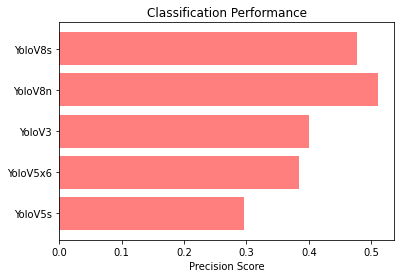

In [14]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

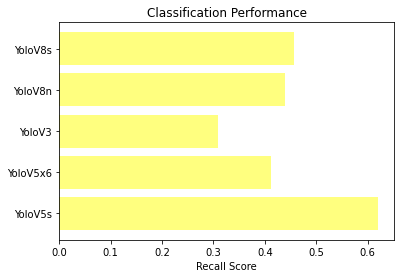

In [15]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# mAP

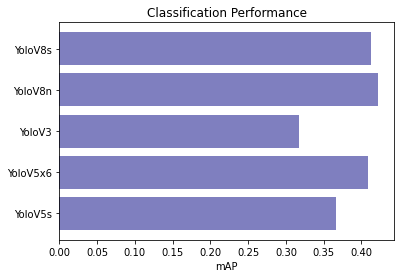

In [16]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mAP, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP')
plt2.title('Classification Performance')
plt2.show()